In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
volumes = [
    #     2021-01-08 @ close
    np.array([2.3000e+01,        0, 1.0000e+00, 1.3000e+01, 1.0000e+01,
       1.0000e+00, 3.9000e+01, 8.0000e+00, 1.0000e+00, 9.0000e+00,
       2.0000e+00, 4.0000e+00, 3.3000e+01, 6.6000e+01, 1.9000e+01,
       1.0300e+02, 8.2000e+01, 1.1000e+01, 7.4000e+02, 1.8000e+01,
       4.2000e+01, 2.5000e+01, 4.2100e+02, 5.5200e+02, 2.0330e+03,
       1.2160e+03, 8.4830e+03, 5.7420e+03, 1.4302e+04, 7.3430e+03,
       1.9909e+04, 9.5010e+03, 1.6006e+04, 7.5110e+03, 8.4610e+03,
       2.3830e+03, 7.3250e+03, 7.1700e+02, 3.1965e+04, 3.5800e+02,
       1.5250e+03, 4.2700e+02, 1.1210e+03, 5.1100e+02, 3.8600e+02,
       3.2850e+03, 6.3900e+02, 2.2700e+02, 1.3200e+02, 4.5000e+01,
       9.0300e+02, 3.0000e+00, 1.7000e+01, 1.3000e+01, 3.5000e+01,
       1.7700e+02, 4.5000e+01, 4.6000e+01, 5.1000e+01, 7.0000e+00,
       2.7990e+03]),
    #     2021-01-11 @ 20:05 London
    np.array([2.3000e+01,        0, 1.0000e+00, 1.3000e+01, 1.0000e+01,
       1.0000e+00, 3.9000e+01, 3.0000e+00, 1.2000e+01, 1.8000e+01,
       3.0000e+01, 1.8000e+01, 8.9000e+01, 6.2000e+01, 4.3000e+01,
       1.3000e+02, 7.3000e+01, 1.0000e+01, 2.9900e+02, 4.1000e+01,
       4.9000e+01, 5.3000e+01, 4.2200e+02, 6.6000e+01, 1.1050e+03,
       3.3800e+02, 5.5060e+03, 1.5080e+03, 1.3064e+04, 6.4130e+03,
       1.9201e+04, 1.2869e+04, 1.7897e+04, 8.8210e+03, 1.2428e+04,
       3.0190e+03, 5.4570e+03, 1.7490e+03, 2.9961e+04, 7.6800e+02,
       8.0300e+02, 1.1990e+03, 8.3700e+02, 3.9400e+02, 4.6100e+02,
       9.8300e+02, 1.3000e+02, 5.3200e+02, 1.2600e+02, 5.2000e+01,
       9.5500e+02, 4.0000e+00, 1.6900e+02, 1.3000e+01, 1.5900e+02,
       7.0000e+00, 4.5000e+01, 4.6000e+01, 1.5000e+01, 2.0000e+00,
       3.0000e+02]),
    #     2021-01-11 @ 20:17 London
    np.array([2.3000e+01,        0, 1.0000e+00, 1.3000e+01, 1.0000e+01,
       1.0000e+00, 3.9000e+01, 3.0000e+00, 1.2000e+01, 1.8000e+01,
       3.0000e+01, 1.8000e+01, 8.9000e+01, 6.2000e+01, 4.4000e+01,
       1.3000e+02, 7.5000e+01, 1.0000e+01, 2.9900e+02, 4.9000e+01,
       4.9000e+01, 5.3000e+01, 4.2300e+02, 6.6000e+01, 1.1050e+03,
       3.4200e+02, 5.5220e+03, 1.5490e+03, 1.3114e+04, 6.4500e+03,
       1.9465e+04, 1.2907e+04, 1.8018e+04, 8.9160e+03, 1.2508e+04,
       3.0210e+03, 5.7380e+03, 1.7510e+03, 3.0173e+04, 7.9600e+02,
       8.1000e+02, 1.1990e+03, 8.4700e+02, 3.9700e+02, 4.6500e+02,
       9.8900e+02, 1.3000e+02, 5.3200e+02, 1.2600e+02, 5.2000e+01,
       9.5500e+02, 5.0000e+00, 1.6900e+02, 1.3000e+01, 1.5900e+02,
       7.0000e+00, 4.5000e+01, 4.6000e+01, 1.5000e+01, 2.0000e+00,
       3.0000e+02]),
    #     2021-01-11 @ 22:06 London, market closed
    np.array([2.3000e+01,        0, 1.0000e+00, 1.3000e+01, 1.0000e+01,
       1.0000e+00, 3.9000e+01, 3.0000e+00, 1.3000e+01, 1.8000e+01,
       3.0000e+01, 1.8000e+01, 9.4000e+01, 6.4000e+01, 5.4000e+01,
       1.3600e+02, 7.7000e+01, 1.3000e+01, 3.1700e+02, 5.2000e+01,
       5.2000e+01, 5.9000e+01, 4.2800e+02, 7.0000e+01, 1.1330e+03,
       4.1900e+02, 5.5820e+03, 1.6650e+03, 1.3454e+04, 7.0670e+03,
       2.1302e+04, 1.5095e+04, 1.9801e+04, 9.6560e+03, 1.3333e+04,
       3.7210e+03, 6.2970e+03, 1.8120e+03, 3.4100e+04, 8.0500e+02,
       9.4500e+02, 1.9210e+03, 1.0300e+03, 4.7600e+02, 9.9100e+02,
       1.6050e+03, 1.4800e+02, 8.0400e+02, 1.3600e+02, 5.5000e+01,
       1.2750e+03, 5.0000e+00, 1.7500e+02, 1.3000e+01, 1.5900e+02,
       7.0000e+00, 1.0000e+01, 4.6000e+01, 1.5000e+01, 2.0000e+00,
       3.0000e+02])
]
(volumes[1] == volumes[2]).sum()
strikes[volumes[2] == np.max(volumes[2])] # 30 is still most popular

In [34]:
op_ints = [
    #     2021-01-08 @ close
    np.array([    4,     0,     1,     1,     0,     0,     1,    99,    11,
          22,    48,   229,   720,  1396,  1145,  2810,  1730,    36,
        7625,   144,  2412,   434,  2627,   
        645, 10301,  
        1550,  8551,
        3281, 12694,  
        3920, 22310,  
        6353, 19020,  
        5061, 12339,  
        3620, 11729,  
        1281, 73768,  
        2221, 95020, # increased *10   
        936,  5570,  
        6938, 10888,
        22659, 2985,  1237,  1508,   993, 19156,  1694,  1047,   450,
        1788,  1713,  1637,   850,   769,   702, 13285]),
    
    #     2021-01-11 @ 20:05 London, market is open
#     np.array([    4,     0,     1,     1,     0,     0,     1,    99,    11,
#           22,    48,   229,   720,  1396,  1145,  2810,  1730,    36,
#         7625,   144,  2412,   434,  2627,   645, 10301,  1550,  8551,
#         3281, 12694,  3920, 22310,  6353, 19020,  5061, 12339,  3620,
#        11729,  1281, 73768,  2221,  9502,   936,  5570,  6938, 10888,
#        22659,  2985,  1237,  1508,   993, 19156,  1694,  1047,   450,
#         1788,  1713,  1637,   850,   769,   702, 13285]),
    
    #     2021-01-11 @ 22:06 London, market closed, damn same as above, after-market?
#     np.array([    4,     0,     1,     1,     0,     0,     1,    99,    11,
#           22,    48,   229,   720,  1396,  1145,  2810,  1730,    36,
#         7625,   144,  2412,   434,  2627,   645, 10301,  1550,  8551,
#         3281, 12694,  3920, 22310,  6353, 19020,  5061, 12339,  3620,
#        11729,  1281, 73768,  2221,  9502,   936,  5570,  6938, 10888,
#        22659,  2985,  1237,  1508,   993, 19156,  1694,  1047,   450,
#         1788,  1713,  1637,   850,   769,   702, 13285]),
    
    #     2021-01-12 @ 12-40 London, market closed.
    np.array([    4,     0,     1,     1,     0,     0,     1,    99,    10,
          17,    42,   132,   454,   293,   515,  1801,  1205,    49,
        7272,   133,  2400,   414,  2492,   622,  9998,  1582,  7828,
        3394, 13505,  4894, 24398,  9693, 21084,  6853, 16553,  5383,
       14035,  1914,
              80195,  # +6427 
              2369,  9343,  2193,  5786,  6938, 10989,
       22821,  3041,  1795,  1606,   989, 18993,  1693,  1097,   447,
        1832,  1711,  1647,   850,   779,   702, 13218]),
    
    #     fantasy, coz I'm doing in Monday morning before market opened
    np.array([    4,     0,     1,     1,     0,     0,     1,    99,    11,
          22,    48,   229,   720,  1396,  1145,  2810,  1730,    36,
        7625,   144,  2412,   434,  2627,   
        645, 10301 * 1.10,  
        1550,  8551 * 1.10,
        3281, 12694 * 1.10,  
        3920, 22310 * 1.15,  
        6353, 19020 * 1.20,  
        5061, 12339 * 1.25,  
        3620, 11729 * 10.25,  
        1281, 73768 * 1.25,  
        2221,  9502 * 1.10,   
        936,  5570 * 1.25,  
        6938, 10888 * 1.20,
        22659, 2985,  1237,  1508,   993, 19156,  1694,  1047,   450,
        1788,  1713,  1637,   850,   769,   702, 13285])
] 
# openInterest is updated end of day?
(op_ints[1] == op_ints[2]).sum()
80195 - 73768

6427

In [35]:
# Most Interesting Strike 3d plot
# shows which strike o_traders are most interested per given ticker & expiration date. 
# %matplotlib qt

# expirations = np.arange(1,3) # 2
expirations = np.array([1]) # only Jan 15
# days = np.arange(1,6) # days observed
days = np.array([1,2])
# curr_price = 50
# consensus = np.array([50, 55, 60, 60, 60]) # general price forecast for next 5 periods
contracts = np.array(['PLTR210115C00003000', 'PLTR210115C00004000',
       'PLTR210115C00005000', 'PLTR210115C00006000',
       'PLTR210115C00007000', 'PLTR210115C00008000',
       'PLTR210115C00009000', 'PLTR210115C00010000',
       'PLTR210115C00011000', 'PLTR210115C00012000',
       'PLTR210115C00013000', 'PLTR210115C00014000',
       'PLTR210115C00015000', 'PLTR210115C00016000',
       'PLTR210115C00017000', 'PLTR210115C00018000',
       'PLTR210115C00019000', 'PLTR210115C00019500',
       'PLTR210115C00020000', 'PLTR210115C00020500',
       'PLTR210115C00021000', 'PLTR210115C00021500',
       'PLTR210115C00022000', 'PLTR210115C00022500',
       'PLTR210115C00023000', 'PLTR210115C00023500',
       'PLTR210115C00024000', 'PLTR210115C00024500',
       'PLTR210115C00025000', 'PLTR210115C00025500',
       'PLTR210115C00026000', 'PLTR210115C00026500',
       'PLTR210115C00027000', 'PLTR210115C00027500',
       'PLTR210115C00028000', 'PLTR210115C00028500',
       'PLTR210115C00029000', 'PLTR210115C00029500',
       'PLTR210115C00030000', 'PLTR210115C00030500',
       'PLTR210115C00031000', 'PLTR210115C00031500',
       'PLTR210115C00032000', 'PLTR210115C00033000',
       'PLTR210115C00034000', 'PLTR210115C00035000',
       'PLTR210115C00036000', 'PLTR210115C00037000',
       'PLTR210115C00038000', 'PLTR210115C00039000',
       'PLTR210115C00040000', 'PLTR210115C00041000',
       'PLTR210115C00042000', 'PLTR210115C00043000',
       'PLTR210115C00044000', 'PLTR210115C00045000',
       'PLTR210115C00046000', 'PLTR210115C00047000',
       'PLTR210115C00048000', 'PLTR210115C00049000',
       'PLTR210115C00050000'])
strikes = np.array([ 3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. , 13. ,
       14. , 15. , 16. , 17. , 18. , 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 33. ,
       34. , 35. , 36. , 37. , 38. , 39. , 40. , 41. , 42. , 43. , 44. ,
       45. , 46. , 47. , 48. , 49. , 50. ]) # 61 available strikes


# MIS? 30! current price = 25.20
mis = strikes[op_ints[1] == np.max(op_ints[1])]
# mis

max_op_ints = np.array([x.max() for x in op_ints])
# max_op_ints
# mis_strikes = strikes[max_opints]
# find index of each max_op_int
def max_val_id(arr):
    return np.where(arr == np.max(arr))[0][0]

max_op_ints_idx = [max_val_id(arr) for arr in op_ints]
max_op_ints_idx
# and match it to strike
mis_strikes = strikes[max_op_ints_idx]
mis_strikes

array([31., 30., 29.])

In [72]:
# strikes are the only INDEPENDENT variable which we ultimately are interested in. 
# we expect arr = [(exp1, day1, strike),(exp1, day2, strike),] in which we iterate DAYs first (like for this exp day we have 5 days of observations)
# re-arrange arr so that [(exp1, day1, strike), (exp2, day1, strike), (exp1, day2, strike), (exp2, day2, strike)]

# one week of observations for next 6 months
mis_strikes = np.array([
    [20, 22, 24, 25, 30, 30], # rows = days, cols = exps, val = mis_strikes
    [20, 25, 26, 27, 31, 32],
    [25, 27, 28, 26, 31, 35],
    [30, 35, 35, 36, 31, 37],
    [30, 35, 35, 36, 31, 38]
])
    

df3d = pd.DataFrame(mis_strikes, 
                    columns=[1, 2, 3, 4, 5, 6]
#                     columns=['a', 'b', 'c', 'd', 'e', 'f']
                   )
df3d

,1,2,3,4,5,6
0,20,22,24,25,30,30
1,20,25,26,27,31,32
2,25,27,28,26,31,35
3,30,35,35,36,31,37
4,30,35,35,36,31,38


In [69]:
def prepare_xyz(df):
    arr = []

    for day in df.index:
        for exp in df.columns:
            bar = [exp, day, df.loc[day, exp]]
            arr.append(bar)
    #         print(bar)
    x = [] 
    y = [] 
    z = []

    for bar in arr:
        exp, day, strike = bar
        x.append(exp)
        y.append(day)
        z.append(strike)
        
    return x, y, z



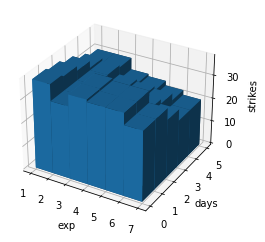

In [73]:
def my_bar3d_plotter(ax, x, y, z, width=1, depth=1, labels=['x', 'y', 'z']):
    bottom = np.zeros_like(z)
    hight = z
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    out = ax.bar3d(x, y, bottom, width, depth, hight)
    return out



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x, y, z = prepare_xyz(df3d)
    
my_bar3d_plotter(ax, x, y, np.flip(z), labels=['exp', 'days', 'strikes'])

In [5]:
# parse contractSymbol date
from datetime import date
def parse_contractSymbol(cs, rdate=False):
    #     cs = 'PLTR210108C00025000'
    ticker = cs [:-15]
    year = cs[-15:-13]
    month = cs[-13:-11]
    day = cs[-11:-9]
    instr_type = cs[-9]
    strike = float(cs[-8:])/1000
    
    if rdate == True:
        return date(2000+int(year), int(month), int(day))
    
    return (ticker, year, month, day, instr_type, strike)

# parse_contractSymbol('PLTR210108C00025000') # ('PLTR', '21', '01', '08', 'C', 25.0)
# parse_contractSymbol('PLTR210108C00025000', rdate=True) # 

# pick one the most interesting contract symbol
def max_interest_by(df, col='openInterest'):
    return df.loc[df.sort_values(by=[col], ascending=False)[col].idxmax()] # Series


# ('2021-01-15', 30.0, 80195)

In [6]:
# produce one bar from an option chain by col
# I will loop over all_calls with this, 
def add_one_mis_bar_to_x_axis(o_chain, exp='a', misdf=pd.DataFrame([]),  col='openInterest'):
    # MIS DataFrame is 
    # rows == days of observations
    # cols = expirations
    # values = MIS
    # mis == most interesting strike by openInterest
    _misdf = misdf.copy() # !!!!
    mis = max_interest_by(o_chain, col=col)
    exp, strike = parse_contractSymbol(mis['contractSymbol'], rdate=True), mis['strike']
    # print(exp, strike)
    _misdf[exp] = [strike]
    return _misdf


# calls1 = pd.read_csv('D:\\code\\test\\csv\\calls1.csv', index_col=0)
# calls2 = pd.read_csv('D:\\code\\test\\csv\\calls2.csv', index_col=0)
calls1 = pd.read_csv('./csv/c_e1_d1.csv', index_col=0)
calls2 = pd.read_csv('./csv/c_e1_d2.csv', index_col=0)

all_calls = [calls1, calls2]
# print(calls1.shape) # (61, 14)
# print(calls2.shape) # (39, 14)

# total = pd.DataFrame([])
# for call in all_calls:
#     total = add_one_mis_bar_to_x_axis(call, misdf=total)

def concat_dfs(dfs):
    return pd.concat(dfs, axis=0, ignore_index=True)

# concat_dfs([add_one_mis_bar_to_x_axis(calls1, exp='a'), add_one_mis_bar_to_x_axis(calls2, exp='b')])
# concat_dfs([add_one_mis_bar_to_x_axis(calls1), add_one_mis_bar_to_x_axis(calls2)])



# add two bars to x, same observation day
a = add_one_mis_bar_to_x_axis(calls1)
add_one_mis_bar_to_x_axis(calls2, misdf=a)

# add a bar to y == another observation day, another exp
# concat_dfs([pd.DataFrame([666], columns=['a']), pd.DataFrame([111], columns=['b'])])
concat_dfs([add_one_mis_bar_to_x_axis(calls1), add_one_mis_bar_to_x_axis(calls2)])

# add two bars to
# def add_one_mis_bar_to_y_axis(x, day)

,2021-01-15
0,30.0
1,3.0
